In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load and explore the dataset
data = pd.read_csv("D:\internship 1\dataset\diabetes_prediction_dataset.csv")
print("First 5 rows:\n", data.head())
print("\nDataset Info:\n")
print(data.info())

First 5 rows:
    gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  

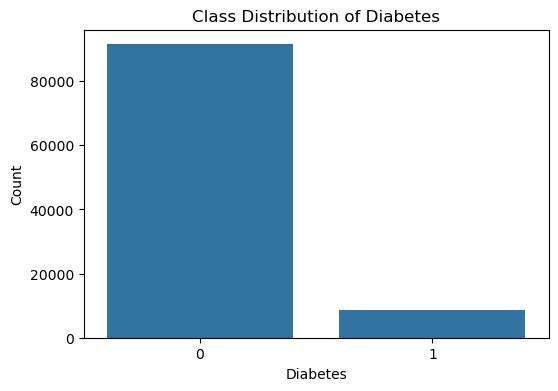

In [3]:
# Visualize class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='diabetes', data=data)
plt.title("Class Distribution of Diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.show()

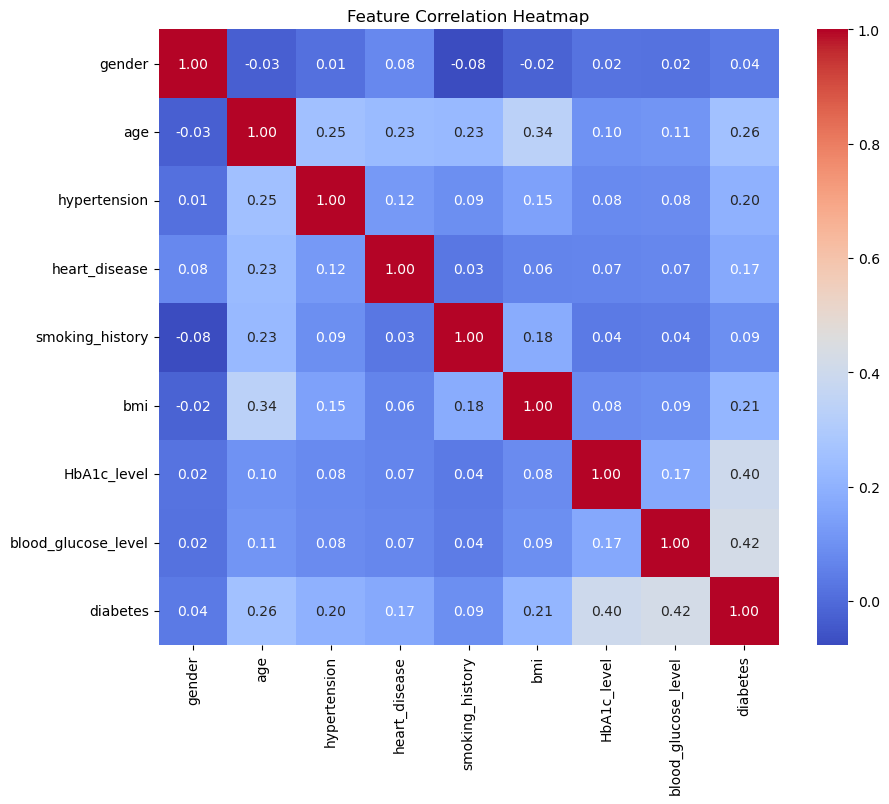

In [4]:
# Visualize correlation heatmap
plt.figure(figsize=(10,8))
encoded_data = data.copy()
# Encode categorical for heatmap
encoded_data['gender'] = LabelEncoder().fit_transform(encoded_data['gender'])
encoded_data['smoking_history'] = LabelEncoder().fit_transform(encoded_data['smoking_history'])
encoded_data['diabetes'] = LabelEncoder().fit_transform(encoded_data['diabetes'])
sns.heatmap(encoded_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

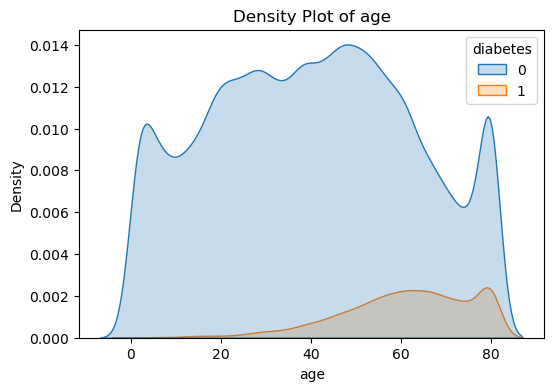

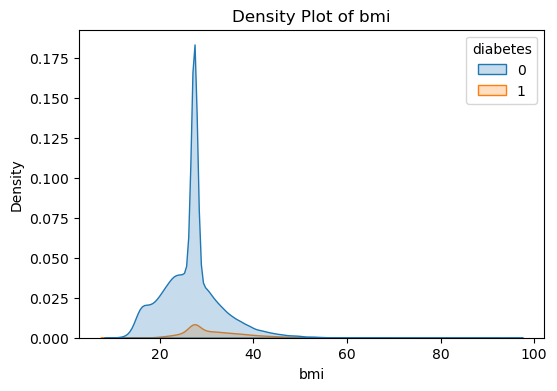

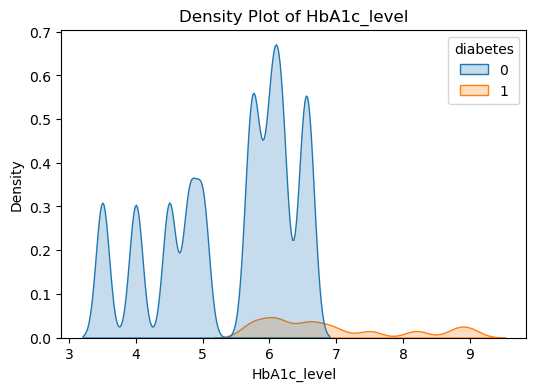

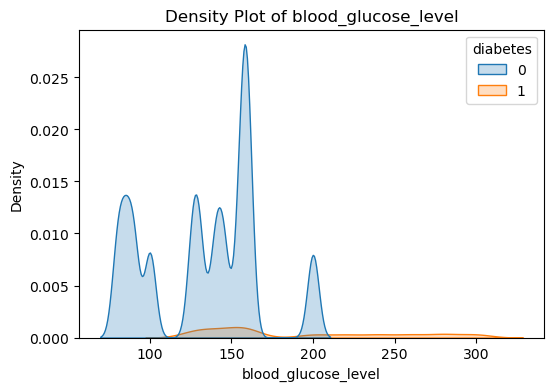

In [5]:
# Density plot for continuous features
continuous_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for col in continuous_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=data, x=col, hue='diabetes', fill=True)
    plt.title(f"Density Plot of {col}")
    plt.show()

In [6]:
# Encode categorical columns for model
le1 = LabelEncoder()
data['gender'] = le1.fit_transform(data['gender'])

le2 = LabelEncoder()
data['smoking_history'] = le2.fit_transform(data['smoking_history'])

In [7]:
# Separate features and target
X = data.drop(columns=['diabetes'])
y = data['diabetes']

In [8]:
# Scale features for KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# --- KNN Classification ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_train_pred_knn = knn.predict(X_train)
print("\n--- KNN Results ---")
print('Training Accuracy:', accuracy_score(y_train, y_train_pred_knn))
print('Test Accuracy:', accuracy_score(y_test, y_pred_knn))
print('Classification Report:\n', classification_report(y_test, y_pred_knn))


--- KNN Results ---
Training Accuracy: 0.9695571428571429
Test Accuracy: 0.9609333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     27453
           1       0.90      0.61      0.73      2547

    accuracy                           0.96     30000
   macro avg       0.93      0.80      0.85     30000
weighted avg       0.96      0.96      0.96     30000



In [10]:
# --- Decision Tree Classification ---
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Base model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_dt, y_train_dt)

y_pred_dt = dt.predict(X_test_dt)
y_train_pred_dt = dt.predict(X_train_dt)

print("\n--- Decision Tree (Before Tuning) ---")
print('Training Accuracy:', accuracy_score(y_train_dt, y_train_pred_dt))
print('Test Accuracy:', accuracy_score(y_test_dt, y_pred_dt))


--- Decision Tree (Before Tuning) ---
Training Accuracy: 0.9993142857142857
Test Accuracy: 0.9529666666666666


In [12]:
# Tuned model
dt_tuned = DecisionTreeClassifier(max_depth=4, min_samples_split=5, criterion='entropy', random_state=42)
dt_tuned.fit(X_train_dt, y_train_dt)

y_pred_dt_tuned = dt_tuned.predict(X_test_dt)
y_train_pred_dt_tuned = dt_tuned.predict(X_train_dt)

print("\n--- Decision Tree (After Tuning) ---")
print('Training Accuracy:', accuracy_score(y_train_dt, y_train_pred_dt_tuned))
print('Test Accuracy:', accuracy_score(y_test_dt, y_pred_dt_tuned))
print('Classification Report:\n', classification_report(y_test_dt, y_pred_dt_tuned))


--- Decision Tree (After Tuning) ---
Training Accuracy: 0.972
Test Accuracy: 0.9715666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     27453
           1       1.00      0.67      0.80      2547

    accuracy                           0.97     30000
   macro avg       0.98      0.83      0.89     30000
weighted avg       0.97      0.97      0.97     30000



In [13]:
# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Random Forest Training Accuracy
y_train_pred_rf = rf_model.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, y_train_pred_rf)
print(f"Random Forest Training Accuracy: {rf_train_accuracy:.4f}")

# Random Forest Testing Accuracy
y_test_pred_rf = rf_model.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, y_test_pred_rf)
print(f"Random Forest Testing Accuracy: {rf_test_accuracy:.4f}")




Random Forest Training Accuracy: 0.9993
Random Forest Testing Accuracy: 0.9705


In [14]:
# Example: predicting for one new person
new_person = pd.DataFrame({
    'gender': ['Male'],
    'age': [19],
    'hypertension': [1],
    'heart_disease': [0],
    'smoking_history': ['never'],
    'bmi': [21.5],
    'HbA1c_level': [4.0],
    'blood_glucose_level': [70]
})

# Encode categorical values like before
new_person['gender'] = le1.transform(new_person['gender'])
new_person['smoking_history'] = le2.transform(new_person['smoking_history'])

# Scale (important for KNN)
new_person_scaled = scaler.transform(new_person)

# Predict using KNN
print("KNN Prediction:", knn.predict(new_person_scaled))

# Predict using Decision Tree
print("Decision Tree Prediction:", dt_tuned.predict(new_person))

# Example prediction with the new data
new_person_pred_rf = rf_model.predict(new_person)
print("Random Forest Prediction for new person:", new_person_pred_rf)

KNN Prediction: [0]
Decision Tree Prediction: [0]
Random Forest Prediction for new person: [1]


C:\Users\saich\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [15]:
import joblib

joblib.dump(dt_tuned, 'dt_tuned_model.pkl')
joblib.dump(le1, 'gender_le.pkl')
joblib.dump(le2, 'smoking_history_le.pkl')

['smoking_history_le.pkl']